**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [26]:
import pandas as pd
import numpy as np
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [2]:
adver_data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [74]:
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [23]:
adver_data[['TV', 'Radio', 'Newspaper']].values

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [22]:
adver_data[['Sales']].values

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [21]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data[['Sales']].values

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [31]:
np.mean(X, axis=0)

array([147.0425,  23.264 ,  30.554 ])

In [35]:
np.std(X, axis=0)

array([85.63933176, 14.80964564, 21.72410606])

In [37]:
means, stds = np.mean(X, axis=0), np.std(X, axis=0)

In [51]:
X - means

array([[ 8.305750e+01,  1.453600e+01,  3.864600e+01],
       [-1.025425e+02,  1.603600e+01,  1.454600e+01],
       [-1.298425e+02,  2.263600e+01,  3.874600e+01],
       [ 4.457500e+00,  1.803600e+01,  2.794600e+01],
       [ 3.375750e+01, -1.246400e+01,  2.784600e+01],
       [-1.383425e+02,  2.563600e+01,  4.444600e+01],
       [-8.954250e+01,  9.536000e+00, -7.054000e+00],
       [-2.684250e+01, -3.664000e+00, -1.895400e+01],
       [-1.384425e+02, -2.116400e+01, -2.955400e+01],
       [ 5.275750e+01, -2.066400e+01, -9.354000e+00],
       [-8.094250e+01, -1.746400e+01, -6.354000e+00],
       [ 6.765750e+01,  7.360000e-01, -2.655400e+01],
       [-1.232425e+02,  1.183600e+01,  3.534600e+01],
       [-4.954250e+01, -1.566400e+01, -2.335400e+01],
       [ 5.705750e+01,  9.636000e+00,  1.544600e+01],
       [ 4.835750e+01,  2.443600e+01,  2.234600e+01],
       [-7.924250e+01,  1.333600e+01,  8.344600e+01],
       [ 1.343575e+02,  1.633600e+01,  2.524600e+01],
       [-7.784250e+01, -2.76

In [48]:
X - np.ones((len(X), 3)) * means

array([[ 8.305750e+01,  1.453600e+01,  3.864600e+01],
       [-1.025425e+02,  1.603600e+01,  1.454600e+01],
       [-1.298425e+02,  2.263600e+01,  3.874600e+01],
       [ 4.457500e+00,  1.803600e+01,  2.794600e+01],
       [ 3.375750e+01, -1.246400e+01,  2.784600e+01],
       [-1.383425e+02,  2.563600e+01,  4.444600e+01],
       [-8.954250e+01,  9.536000e+00, -7.054000e+00],
       [-2.684250e+01, -3.664000e+00, -1.895400e+01],
       [-1.384425e+02, -2.116400e+01, -2.955400e+01],
       [ 5.275750e+01, -2.066400e+01, -9.354000e+00],
       [-8.094250e+01, -1.746400e+01, -6.354000e+00],
       [ 6.765750e+01,  7.360000e-01, -2.655400e+01],
       [-1.232425e+02,  1.183600e+01,  3.534600e+01],
       [-4.954250e+01, -1.566400e+01, -2.335400e+01],
       [ 5.705750e+01,  9.636000e+00,  1.544600e+01],
       [ 4.835750e+01,  2.443600e+01,  2.234600e+01],
       [-7.924250e+01,  1.333600e+01,  8.344600e+01],
       [ 1.343575e+02,  1.633600e+01,  2.524600e+01],
       [-7.784250e+01, -2.76

In [52]:
X = (X - means) / stds

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [57]:
X = np.hstack((np.ones((len(X), 1)), X))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [84]:
def mserror(y, y_pred):
    return np.sum((y - y_pred) ** 2) / len(y)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [85]:
answer1 = mserror(adver_data.Sales, adver_data.Sales.median())
print(round(answer1, 3))

28.346


In [86]:
with open('./otvet1.txt', 'w') as f:
    f.write(str(answer1))

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [96]:
%%time
np.linalg.pinv(X).dot(y)

CPU times: user 1.57 ms, sys: 383 µs, total: 1.95 ms
Wall time: 867 µs


array([[14.0225    ],
       [ 3.91925365],
       [ 2.79206274],
       [-0.02253861]])

In [97]:
%%time
np.linalg.solve(np.transpose(X).dot(X), np.transpose(X).dot(y))

CPU times: user 404 µs, sys: 113 µs, total: 517 µs
Wall time: 440 µs


array([[14.0225    ],
       [ 3.91925365],
       [ 2.79206274],
       [-0.02253861]])

In [98]:
def normal_equation(X, y):
    return np.linalg.solve(np.transpose(X).dot(X), np.transpose(X).dot(y))

In [99]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[14.0225    ]
 [ 3.91925365]
 [ 2.79206274]
 [-0.02253861]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [118]:
[1] + list(adver_data.mean()[:-1])

[1, 147.0425, 23.264000000000024, 30.553999999999995]

In [119]:
np.mean(X, axis=0)

array([ 1.00000000e+00,  1.22124533e-16, -4.52970994e-16,  2.22044605e-16])

In [120]:
np.mean(X, axis=0).dot(norm_eq_weights)

array([14.0225])

In [123]:
answer2 = np.mean(X, axis=0).dot(norm_eq_weights)
print(round(answer2[0], 3))
with open('./otvet2.txt', 'w') as f:
    f.write(str(round(answer2[0], 3)))

14.022


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [127]:
def linear_prediction(X, w):
    return X.dot(w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [131]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(round(answer3, 3))
with open('./otvet3.txt', 'w') as f:
    f.write(str(round(answer3, 3)))

2.784


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [233]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = (2/len(X)) * (X[train_ind].dot(w) - y[train_ind])
    grad1 = (2/len(X)) * X[train_ind][1] * (X[train_ind].dot(w) - y[train_ind])
    grad2 = (2/len(X)) * X[train_ind][2] * (X[train_ind].dot(w) - y[train_ind])
    grad3 = (2/len(X)) * X[train_ind][3] * (X[train_ind].dot(w) - y[train_ind])
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [235]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        w_prev = w
        random_ind = np.random.randint(X.shape[0])
        w = stochastic_gradient_step(X, y, w, random_ind, eta=eta)
        errors.append(mserror(y, linear_prediction(X, w)))
        weight_dist = np.linalg.norm(w_prev - w)
        iter_num += 1
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [236]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([0, 0, 0, 0]).reshape((4, 1)), max_iter=10**5)

CPU times: user 3.19 s, sys: 8.62 ms, total: 3.2 s
Wall time: 3.2 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

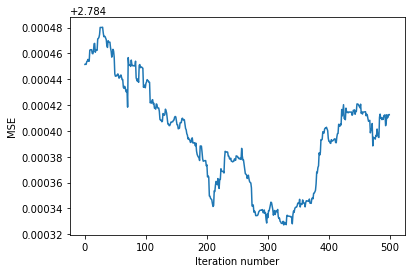

In [243]:
%pylab inline
plot(range(500), stoch_errors_by_iter[-500:])
xlabel('Iteration number')
ylabel('MSE')

In [248]:
stoch_errors_by_iter[-50:]

[2.7844187432202796,
 2.7844178683653706,
 2.7844206732930443,
 2.7844135766151994,
 2.784414791013297,
 2.7844130343616857,
 2.7844145256357367,
 2.7844145626202317,
 2.78441467273077,
 2.784414774412371,
 2.7844148640451816,
 2.7844117167461975,
 2.7844129012687158,
 2.784412135425346,
 2.7844094599349374,
 2.7844073807116807,
 2.7844077625004364,
 2.7844081634167743,
 2.7843984876759196,
 2.784401405396261,
 2.784400847463875,
 2.784405711795225,
 2.784388374112179,
 2.784395022462186,
 2.784394649698291,
 2.784394235255588,
 2.7843936239283504,
 2.7843964814241,
 2.784396070477567,
 2.784401437894433,
 2.7843972510768396,
 2.7843952768710505,
 2.784394897726998,
 2.7844106449734665,
 2.7844129911978883,
 2.784409855076126,
 2.7844101247343165,
 2.7844087286300394,
 2.78440988033792,
 2.784408894874169,
 2.784411783755071,
 2.7844120305197793,
 2.784412432169718,
 2.7844040186178045,
 2.78440697194468,
 2.7844125046389747,
 2.784410075611238,
 2.7844107986666473,
 2.7844125883527586

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

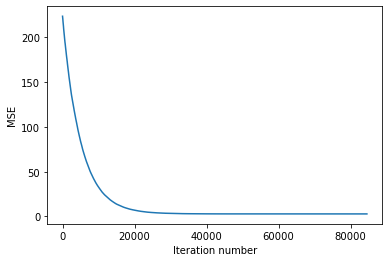

In [244]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [245]:
stoch_grad_desc_weights

array([[ 1.40190566e+01],
       [ 3.91069256e+00],
       [ 2.78209808e+00],
       [-8.10462217e-03]])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [247]:
min(stoch_errors_by_iter)

2.784286816635732

In [246]:
stoch_errors_by_iter[-1]

2.784412588406704

In [249]:
mserror(y, linear_prediction(X, norm_eq_weights))

2.784126314510936

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [251]:
answer4 = stoch_errors_by_iter[-1]
print(round(answer4, 3))
with open('./otvet4.txt', 'w') as f:
    f.write(str(round(answer4, 3)))

2.784
